# E4 : Resnik 1995

We are going to move on now to techniques which require the use of corpora because they incorporate in their formulas the probability of particular words or concepts occuring.

This probability of words occuring is called Information Content (IC) and is defined as $-logP(c)$ where $P(c)$ is the probability of encountering an instance of a concept c in a large corpus. Notice that the less often a concept occurs the more Information Content it provides, this idea is pulled straight out of Information Theory.

The problem (or advantage) of this these approaches is that you can get better results if the corpora are very much like the short answers you are scoring, however, if the corpora are, for instance, the complete works of Shakespeare and you try to calculate the IC of words about computers the similarities will not be as accurate. Because of this, I'm interested to see how these methods perform.

The Resnik formula for the similarity between two texts is:
$$
Sim_{res} = IC(LCS)
$$

I've decided to use the Brown Corpus for calculating the information content of words because it provides a broad array of input texts from many different disciplines and is readily available in the NLTK python package.

#### References

1. [NLTK Accessing Corpora](https://www.nltk.org/book/ch02.html)
2. [Brown Corpus](https://en.wikipedia.org/wiki/Brown_Corpus)
2. [Resnik 1995 - Using Information Content to Evaluate Semantic Similarity](./papers/Resnik_1995-using-info-content-to-evaluate-semantic-similarity.pdf)


In [1]:
import sys
sys.path.append('../')
sys.path.append('../../../')
import pandas as pd
import numpy as np
import libs.stats as stats
import libs.preprocessing as pp
import libs.data as data
import libs.utils as utils
import exp_libs.wordnet as wn
import spacy
from importlib import reload

In [2]:
df_en = data.load_dataframe("../../../datasets/final/en/asag_v2_en_filter.csv")
display(df_en.head(1))
nlp_en = spacy.load('en')

resnik_fn = wn.create_resnik_function(wn.IC_BROWN) 

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

### Exp. 1: Lang=English, Lexical_Matching=False

In [3]:
res1 = wn.run_entailment_model(nlp_en, df_en, sim_fn=resnik_fn, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.


             precision    recall  f1-score   support

        0.0       0.03      0.14      0.04        14
        1.0       0.01      0.12      0.01         8
        2.0       0.14      0.36      0.21       234
        3.0       0.07      0.31      0.11       157
        4.0       0.30      0.14      0.19       676
        5.0       0.43      0.09      0.15       921

avg / total       0.32      0.16      0.17      2010

Pearson's R: 0.16124051276006118
Cohen's Kappa: -0.002132754016000993
MAE: 1.319402985074627
Accuracy: 15.62%
Precision: 32.17%
Recall: 15.62%
F1-Measure: 16.66%


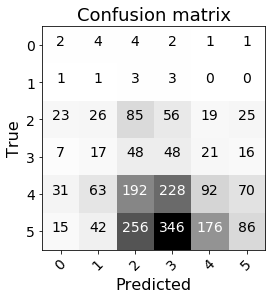

In [4]:
stats.print_all_stats(res1['y_true'], res1['y_pred'])

exp1_data = stats.get_all_stats(res1['y_true'], res1['y_pred'])
# %store exp1_data

stats.plot_confusion_matrix(stats.cm(res1['y_true'], res1['y_pred']), classes=np.arange(6))

In [5]:
## Store Results
data.save('../tmp/e4_exp_01', res1)
data.load('../tmp/e4_exp_01')

{'y_pred': array([2, 3, 4, ..., 0, 3, 2]),
 'y_pred_raw': array([0.37598322, 0.58572637, 0.77272727, ..., 0.        , 0.66666667,
        0.40880474]),
 'y_true': array([4., 5., 4., ..., 2., 5., 2.]),
 'y_true_raw': array([3.5, 5. , 4. , ..., 2.5, 5. , 1.5])}

### Exp. 3: Lang=English, Lexical_Matching=False, MA=3

In [6]:
res2 = wn.run_entailment_model_k(nlp_en, df_en, sim_fn=resnik_fn, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'],
                                  ma_count=3)

batch: 100 done.
batch: 200 done.
batch: 300 done.
batch: 400 done.
batch: 500 done.
batch: 600 done.
batch: 700 done.
batch: 800 done.
batch: 900 done.
batch: 1000 done.
batch: 1100 done.
batch: 1200 done.
batch: 1300 done.
batch: 1400 done.
batch: 1500 done.
batch: 1600 done.
batch: 1700 done.
batch: 1800 done.
batch: 1900 done.
batch: 2000 done.


             precision    recall  f1-score   support

        0.0       0.05      0.14      0.07        14
        1.0       0.05      0.25      0.09         8
        2.0       0.16      0.26      0.20       234
        3.0       0.08      0.39      0.13       157
        4.0       0.30      0.23      0.26       676
        5.0       0.46      0.14      0.22       921

avg / total       0.34      0.20      0.22      2010

Pearson's R: 0.15214950525279355
Cohen's Kappa: 0.0027597754969146404
MAE: 0.8616915422885573
Accuracy: 20.40%
Precision: 33.66%
Recall: 20.40%
F1-Measure: 22.10%


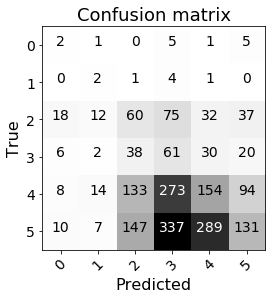

In [7]:
stats.print_all_stats(res2['y_true'], res2['y_pred'])

exp2_data = stats.get_all_stats(res2['y_true'], res2['y_pred'])
# %store exp2_data

stats.plot_confusion_matrix(stats.cm(res2['y_true'], res2['y_pred']), classes=np.arange(6))

In [9]:
## Store Results
data.save('../tmp/e4_exp_02', res2)
data.load('../tmp/e4_exp_02')

{'y_pred': array([2, 3, 4, ..., 0, 3, 2]),
 'y_pred_raw': array([0.4598541 , 0.58572637, 0.77272727, ..., 0.        , 0.66666667,
        0.40880474]),
 'y_true': array([4., 5., 4., ..., 2., 5., 2.]),
 'y_true_raw': array([3.5, 5. , 4. , ..., 2.5, 5. , 1.5])}

### No Spanish Experiment: Need Information Content Dataset